https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0


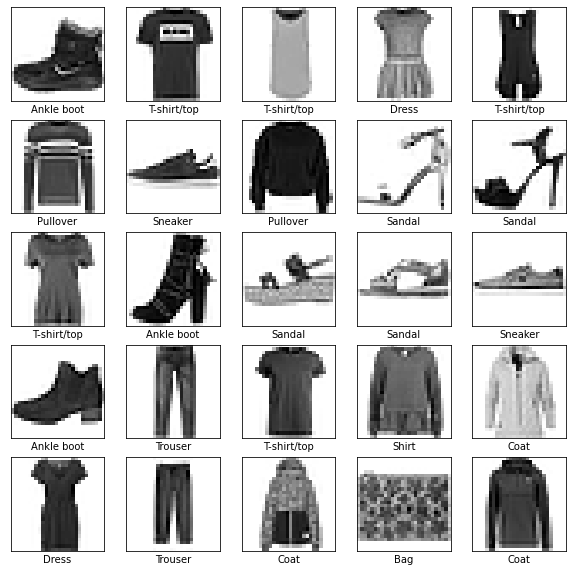

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2948 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2576 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2476 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 - 1s - loss: 0.3332 - accuracy: 0.8836 - 716ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def plot_grid(num_rows, num_cols):
  # Plot the first X test images, their predicted labels, and the true labels.
  # Color correct predictions in blue and incorrect predictions in red.

  num_images = num_rows*num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
  plt.tight_layout()
  plt.show()


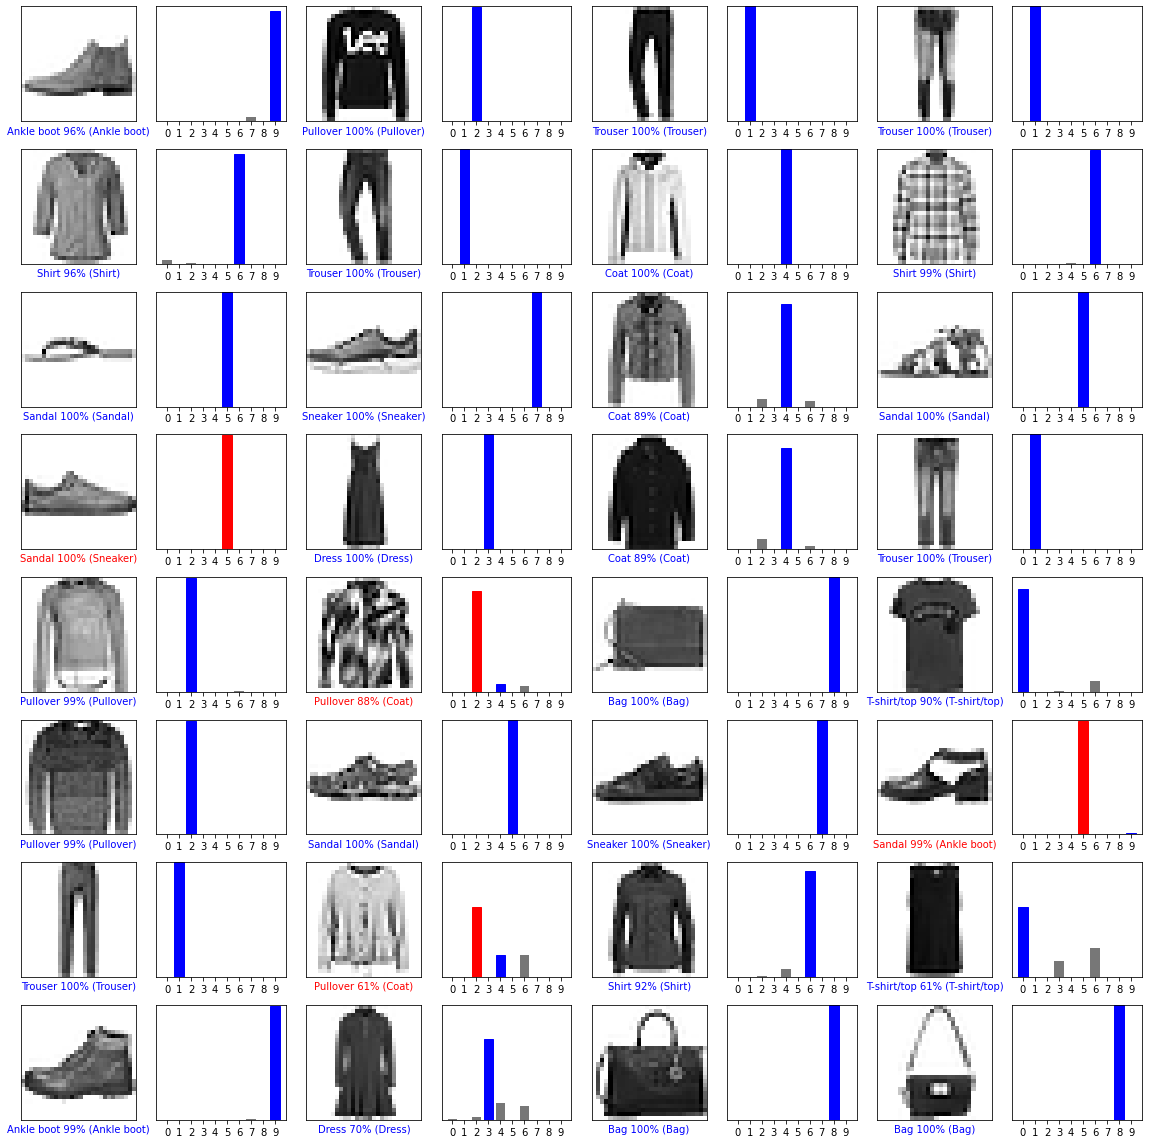

In [16]:
plot_grid(8,4)

In [49]:
def test_one(i):
    print(f"Testing image {i}")
    
    # Grab an image from the test dataset.
    img = test_images[i]
    print(img.shape)

    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img,0))
    print(img.shape)

    predictions_single = probability_model.predict(img)
    print(predictions_single)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plot_image(i, predictions_single[0], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions_single[0], test_labels)
    _ = plt.xticks(range(10), class_names, rotation=45)
    plt.tight_layout()
    plt.show()

Testing image 7568
(28, 28)
(1, 28, 28)
[[7.5894439e-01 2.6824424e-05 1.0008115e-04 2.4478465e-02 6.7458882e-06
  1.7374711e-06 2.1644063e-01 1.0412726e-12 1.0554124e-06 5.5654294e-08]]


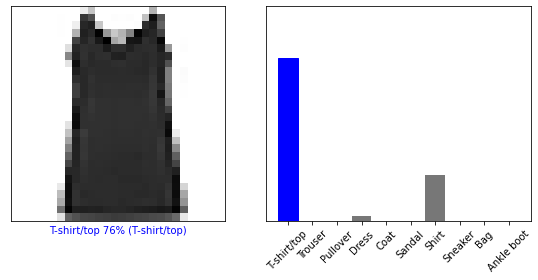

In [63]:
test_one(np.random.randint(test_images.shape[0]))

7368